In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from notebook_utils import NotebookUtilities
import humanize
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import pandas as pd
from storage import Storage
from stats_scraping_utils import StatsScrapingUtilities

ssu = StatsScrapingUtilities(s=Storage())
nu = NotebookUtilities(
    data_folder_path=osp.abspath('../data'),
    saves_folder_path=osp.abspath('../saves')
)


# GDP by Working Age Adults

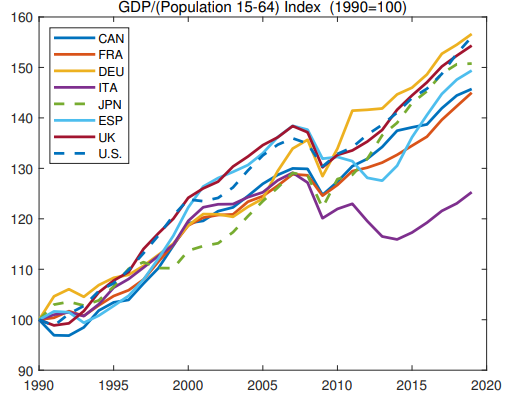

In [3]:

if nu.pickle_exists('gdp_by_country_df'):
    gdp_by_country_df = nu.load_object('gdp_by_country_df')
else:
    
    # wikipedia_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
    html_path = '../data/html/gdp_usd_million_by_country.html'
    
    # Get the table dats frames list for the Wikipedia page
    table_dfs_list = nu.get_wiki_tables(osp.abspath(html_path), verbose=True)
    
    gdp_by_country_df = table_dfs_list[0].copy()
    gdp_by_country_df.columns = ['Country', 'UN region', 'IMF Forecast', 'IMF Year', 'World Bank Estimate', 'World Bank Year', 'United Nations Estimate', 'United Nations Year']
    nu.store_objects(gdp_by_country_df=gdp_by_country_df)
display(gdp_by_country_df)

,Country,UN region,IMF Forecast,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year
0,World,—,104476432,2023,100562011,2022,96698005,2021
1,United States,Americas,26949643,2023,25462700,2022,23315081,2021
2,China,Asia,17700899,[n 1]2023,17963171,[n 3]2022,17734131,[n 1]2021
3,Germany,Europe,4429838,2023,4072192,2022,4259935,2021
4,Japan,Asia,4230862,2023,4231141,2022,4940878,2021
...,...,...,...,...,...,...,...,...
209,Palau,Oceania,267,2023,—,—,218,2021
210,Kiribati,Oceania,246,2023,223,2022,227,2021
211,Nauru,Oceania,150,2023,151,2022,155,2021
212,Montserrat,Americas,—,—,—,—,72,2021


In [4]:

# Get the working-age adult population
if nu.pickle_exists('waa_df'):
    waa_df = nu.load_object('waa_df')
else:
    
    # https://www.census.gov/data-tools/demo/idb/#/pop?COUNTRY_YEAR=2023&COUNTRY_YR_ANIM=2023&menu=popViz&CCODE_SINGLE=**&CCODE=AF,AL,DZ,AD,AO,AI,AG,AR,AM,AW,AU,AT,AZ,BS,BH,BD,BB,BY,BE,BZ,BJ,BM,BT,BO,BA,BW,BR,BN,BG,BF,BI,KH,CM,CA,KY,CF,TD,CL,CN,CO,KM,CG,CD,CK,CR,CI,HR,CU,CW,CY,CZ,DK,DJ,DM,DO,EC,EG,SV,GQ,ER,EE,SZ,ET,FJ,FI,FR,PF,GA,GM,GE,DE,GH,GR,GL,GD,GT,GN,GW,GY,HT,HN,HK,HU,IS,IN,ID,IR,IQ,IE,IL,IT,JM,JP,JO,KZ,KE,KI,KP,KR,XK,KW,KG,LA,LV,LB,LS,LR,LY,LI,LT,LU,MO,MG,MW,MY,MV,ML,MT,MH,MR,MU,MX,FM,MD,MC,MN,ME,MS,MA,MZ,NA,NR,NP,NL,NC,NZ,NI,NE,NG,MK,NO,OM,PK,PW,PA,PG,PY,PE,PH,PL,PT,PR,QA,RO,RU,RW,KN,LC,VC,WS,SM,ST,SA,SN,RS,SC,SL,SG,SX,SK,SI,SB,SO,ZA,SS,ES,LK,SD,SR,SE,CH,SY,TW,TJ,TZ,TH,TG,TO,TT,TN,TR,TM,TC,TV,UG,UA,AE,GB,US,UY,UZ,VU,VE,VN,VG,YE,ZM,ZW&popPages=BYAGE&ageGroup=BR
    file_path = '../data/csv/IDB_11-22-2023.csv'
    
    if nu.csv_exists('IDB_11-22-2023', nu.data_csv_folder): waa_df = nu.load_csv('IDB_11-22-2023', nu.data_folder)
    waa_df.columns = ['GENC', 'Country', 'Year', 'GROUP', 'Population', '% of Population', 'Male Population', '% of Males', 'Female Population', '% of Females', 'Sex ratio of the population']
    waa_df['alpha3'] = waa_df.Country.map(lambda x: ssu.country_to_alpha3_dict[x])
    nu.store_objects(waa_df=waa_df)
population_group_type = '15 - 64'
mask_series = (waa_df.GROUP == population_group_type)
display(waa_df[mask_series])

,GENC,Country,Year,GROUP,Population,% of Population,Male Population,% of Males,Female Population,% of Females,Sex ratio of the population,alpha3
2,CA,Canada,1991,15 - 64,19087500,67.883804,9611400,68.957254,9476100,66.828635,1.014278,CAN
6,CA,Canada,1992,15 - 64,19333485,67.730104,9738433,68.827313,9595052,66.651699,1.014943,CAN
10,CA,Canada,1993,15 - 64,19571416,67.596411,9861485,68.723190,9709931,66.489244,1.015608,CAN
14,CA,Canada,1994,15 - 64,19809379,67.537784,9983917,68.685837,9825462,66.409871,1.016127,CAN
18,CA,Canada,1995,15 - 64,20046727,67.518928,10105571,68.684910,9941156,66.373549,1.016539,CAN
...,...,...,...,...,...,...,...,...,...,...,...,...
918,US,United States,2019,15 - 64,213680073,65.080895,106664985,65.967867,107015088,64.220246,0.996728,USA
922,US,United States,2020,15 - 64,216094666,65.184664,108974535,66.235808,107120131,64.149014,1.017311,USA
926,US,United States,2021,15 - 64,215873991,65.016107,108862765,66.088384,107011226,63.960401,1.017302,USA
930,US,United States,2022,15 - 64,216055318,64.825498,108945315,65.914190,107110003,63.754435,1.017135,USA


In [5]:

# Create the container data frame
start_year = 1990
year_columns_list = [i for i in range(start_year, 2024)]
waa_population_df = pd.DataFrame([], columns=year_columns_list)

mask_series = (waa_df.GROUP == population_group_type)
columns_list = ['alpha3', 'Year', 'Population']
for alpha3, alpha3_df in waa_df[mask_series][columns_list].groupby('alpha3'):
    df = alpha3_df.drop(columns=['alpha3']).rename(columns={'Population': alpha3, 'Year': 'alpha3'}).set_index('alpha3').T
    waa_population_df = pd.concat([waa_population_df, df], axis='index')
for cn in waa_population_df.columns: waa_population_df[cn] = pd.to_numeric(waa_population_df[cn], errors='coerce', downcast='integer')
waa_population_df = waa_population_df.interpolate(axis='index', limit_direction='both')
display(waa_population_df)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
CAN,38368226.0,19087500,19333485,19571416,19809379,20046727,20277316,20493326,20705196,20940556,...,24144011,24218510,24292888,24361898,24423245,24473897,24507737,24542607,24569162,24591249
DEU,38368226.0,55002566,55336622,55608770,55688965,55783606,55919473,55994254,56000444,55953791,...,54251350,54561761,54836539,54772483,54638702,54472173,54199599,53831484,53439114,53032290
ESP,38368226.0,26418050,26628642,26816283,26977198,27101763,27192150,27286580,27399050,27556052,...,30711739,30571810,30518286,30526368,30630506,30867581,31054455,31130899,31189755,31226582
FRA,38368226.0,38513171,38662914,38812282,38950832,39100583,39262714,39427413,39578312,39726703,...,41733523,41650107,41601623,41596179,41595326,41578773,41555519,41538137,41524416,41509285
ITA,62206451.5,38988991,39110556,39197909,39225745,39195720,39164571,39125568,39071061,39002435,...,40136088,40036728,39945852,39887050,39845302,39784076,39694308,39593056,39505158,39427259
JPN,86044677.0,86473991,86793571,87011028,87083272,87069313,86977303,86837093,86701884,86532165,...,77484049,76519012,75739978,75072829,74488883,73985983,73487271,73042241,72702468,72359362
USA,164229455.0,165924186,167953322,169920143,171992191,174237364,176547324,179157964,181754513,184286959,...,211146488,212052986,212841982,213355711,213604267,213680073,216094666,215873991,216055318,216447105


In [6]:

if nu.pickle_exists('gdp_by_working_age_adults_df'):
    gdp_by_working_age_adults_df = nu.load_object('gdp_by_working_age_adults_df')
else:
    gdp_by_working_age_adults_df = gdp_by_country_df.merge(waa_df, on=sorted(set(gdp_by_country_df.columns).intersection(set(waa_df.columns))))
    for cn in ['Population', 'IMF Forecast']: gdp_by_working_age_adults_df[cn] = pd.to_numeric(gdp_by_working_age_adults_df[cn], errors='coerce', downcast='integer')
    gdp_by_working_age_adults_df['gdp_by_working_age_adults'] = gdp_by_working_age_adults_df['IMF Forecast'] / gdp_by_working_age_adults_df.Population
    nu.store_objects(gdp_by_working_age_adults_df=gdp_by_working_age_adults_df)
genc_to_country_dict = gdp_by_working_age_adults_df.set_index('GENC').Country.to_dict()
country_to_genc_dict = gdp_by_working_age_adults_df.set_index('Country').GENC.to_dict()

In [7]:

import re

tla_regex = re.compile('^(CAN|FRA|DEU|ITA|JPN|ESP)$')
mask_series = gdp_by_working_age_adults_df.Country.isin([ssu.alpha3_to_country_dict[key] for key in ssu.alpha3_to_country_dict.keys() if tla_regex.fullmatch(key)]) | gdp_by_working_age_adults_df.GENC.isin(['UK', 'US'])
mask_series &= (gdp_by_working_age_adults_df.GROUP == population_group_type)
alpha3s_list = [ssu.country_to_alpha3_dict.get(country, country) for country in gdp_by_working_age_adults_df[mask_series].Country.unique()]
print(alpha3s_list)
alpha2s_list = gdp_by_working_age_adults_df[mask_series].GENC.unique().tolist()
print(alpha2s_list)
display(gdp_by_working_age_adults_df[mask_series])

['USA', 'DEU', 'JPN', 'FRA', 'ITA', 'CAN', 'ESP']
['US', 'DE', 'JP', 'FR', 'IT', 'CA', 'ES']


,Country,UN region,IMF Forecast,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year,GENC,Year,GROUP,Population,% of Population,Male Population,% of Males,Female Population,% of Females,Sex ratio of the population,gdp_by_working_age_adults
2,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1990,15 - 64,164229455,65.791044,81427735,66.901008,82801720,64.734841,0.983406,0.164098
6,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1991,15 - 64,165924186,65.587623,82321188,66.702074,83602998,64.526059,0.984668,0.162421
10,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1992,15 - 64,167953322,65.475247,83419230,66.603697,84534092,64.398548,0.986812,0.160459
14,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1993,15 - 64,169920143,65.374371,84428892,66.494836,85491251,64.304283,0.987573,0.158602
18,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1994,15 - 64,171992191,65.364999,85487122,66.476515,86505069,64.302487,0.988233,0.156691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2019,15 - 64,30867581,65.939387,15465937,67.642717,15401644,64.313140,1.004174,0.051253
922,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2020,15 - 64,31054455,66.015177,15559701,67.733798,15494754,64.374935,1.004192,0.050945
926,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2021,15 - 64,31130899,66.090948,15598457,67.827954,15532442,64.433848,1.004250,0.050819
930,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2022,15 - 64,31189755,66.131244,15629144,67.888660,15560611,64.455356,1.004404,0.050724


In [8]:

if nu.pickle_exists('imf_datamapper_df'):
    imf_datamapper_df = nu.load_object('imf_datamapper_df')
else:
    import requests # Python 3.6
    
    periods_str = ','.join([str(i) for i in range(start_year, 2024)])
    indicator_type = 'NGDPD'
    url = f'https://www.imf.org/external/datamapper/api/v1/{indicator_type}?periods={periods_str}'
    
    # Navigate to series in API-returned JSON data
    value_obj = requests.get(f'{url}').json()
    rows_list = []
    for country, year_dict in value_obj['values'][indicator_type].items():
        row_dict = {'alpha3': country}
        row_dict = nu.get_row_dictionary(year_dict, row_dict=row_dict)
        rows_list.append(row_dict)
    columns_list = ['alpha3'] + [str(i) for i in range(start_year, 2024)]
    imf_datamapper_df = pd.DataFrame(rows_list)[columns_list]
    nu.store_objects(imf_datamapper_df=imf_datamapper_df)
mask_series = imf_datamapper_df.alpha3.isin(alpha3s_list)
display(imf_datamapper_df[mask_series].set_index('alpha3'))

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,596.089,612.514,594.376,579.059,579.913,605.941,630.598,655.010,634.004,678.417,...,1805.751,1556.508,1527.996,1649.266,1725.300,1743.725,1647.598,2001.487,2137.939,2117.805
DEU,1598.640,1875.618,2136.312,2072.457,2209.934,2588.002,2498.113,2214.694,2242.065,2197.125,...,3890.095,3357.926,3468.896,3689.547,3976.246,3889.607,3884.615,4281.348,4085.681,4429.838
ESP,535.652,576.446,630.122,529.319,531.137,613.946,640.026,589.376,618.414,635.968,...,1372.174,1196.278,1233.215,1312.782,1422.347,1394.474,1277.106,1446.613,1418.916,1582.054
FRA,1272.433,1273.594,1404.391,1324.236,1396.653,1602.130,1606.035,1454.555,1505.184,1494.634,...,2856.701,2439.436,2472.282,2594.235,2792.223,2729.171,2645.300,2958.431,2780.136,3049.016
ITA,1162.272,1227.727,1302.796,1047.616,1080.544,1175.278,1312.783,1243.228,1271.701,1253.690,...,2162.567,1836.824,1876.554,1961.104,2092.881,2011.525,1895.693,2115.762,2012.014,2186.082
JPN,3196.556,3657.348,3988.334,4544.766,4998.798,5545.566,4923.393,4492.449,4098.363,4635.982,...,4896.995,4444.931,5003.678,4930.837,5040.881,5117.995,5050.683,5011.869,4237.528,4230.862
USA,5963.125,6158.125,6520.325,6858.550,7287.250,7639.750,8073.125,8577.550,9062.825,9631.175,...,17550.675,18206.025,18695.100,19477.350,20533.075,21380.950,21060.450,23315.075,25462.725,26949.643


In [9]:

mask_series = imf_datamapper_df.alpha3.isin(alpha3s_list)
gdp_df = imf_datamapper_df[mask_series].set_index('alpha3')
gdp_df.columns = [int(cn) for cn in gdp_df.columns]
display(gdp_df[year_columns_list])

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,596.089,612.514,594.376,579.059,579.913,605.941,630.598,655.010,634.004,678.417,...,1805.751,1556.508,1527.996,1649.266,1725.300,1743.725,1647.598,2001.487,2137.939,2117.805
DEU,1598.640,1875.618,2136.312,2072.457,2209.934,2588.002,2498.113,2214.694,2242.065,2197.125,...,3890.095,3357.926,3468.896,3689.547,3976.246,3889.607,3884.615,4281.348,4085.681,4429.838
ESP,535.652,576.446,630.122,529.319,531.137,613.946,640.026,589.376,618.414,635.968,...,1372.174,1196.278,1233.215,1312.782,1422.347,1394.474,1277.106,1446.613,1418.916,1582.054
FRA,1272.433,1273.594,1404.391,1324.236,1396.653,1602.130,1606.035,1454.555,1505.184,1494.634,...,2856.701,2439.436,2472.282,2594.235,2792.223,2729.171,2645.300,2958.431,2780.136,3049.016
ITA,1162.272,1227.727,1302.796,1047.616,1080.544,1175.278,1312.783,1243.228,1271.701,1253.690,...,2162.567,1836.824,1876.554,1961.104,2092.881,2011.525,1895.693,2115.762,2012.014,2186.082
JPN,3196.556,3657.348,3988.334,4544.766,4998.798,5545.566,4923.393,4492.449,4098.363,4635.982,...,4896.995,4444.931,5003.678,4930.837,5040.881,5117.995,5050.683,5011.869,4237.528,4230.862
USA,5963.125,6158.125,6520.325,6858.550,7287.250,7639.750,8073.125,8577.550,9062.825,9631.175,...,17550.675,18206.025,18695.100,19477.350,20533.075,21380.950,21060.450,23315.075,25462.725,26949.643


In [12]:

def show_index_plot(df, verbose=False):
    
    # Create line plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for alpha3, row_series in df.iterrows():
        values_list = row_series.values.tolist()
        v1990 = values_list[0]
        values_list = [(v - v1990) for v in values_list]
        if verbose: print(values_list)
        years_list = [int(n) for n in row_series.index]
        ax.plot(years_list, values_list, label=alpha3)
    
    # Label the axes
    ax.set_xlabel('Year')

    # Make y tick labels look like the picture above
    yticklabels_list = []
    for text_obj in ax.get_yticklabels():
        text_obj.set_text(100+int(text_obj.get_text().replace('−', '-'))*5)
        yticklabels_list.append(text_obj)
    ax.set_yticklabels(yticklabels_list)
    
    # Make x axis ticks and labels only show at 5 year intervals
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    
    # Add title
    ax.set_title(f'GDP/(Population {population_group_type}) Index ({start_year}=100)')
    
    # Add legend
    ax.legend()
    
    # Show the plot
    plt.show()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,0.000016,0.000032,0.000031,0.000030,0.000029,0.000030,0.000031,0.000032,0.000031,0.000032,...,0.000075,0.000064,0.000063,0.000068,0.000071,0.000071,0.000067,0.000082,0.000087,0.000086
DEU,0.000042,0.000034,0.000039,0.000037,0.000040,0.000046,0.000045,0.000040,0.000040,0.000039,...,0.000072,0.000062,0.000063,0.000067,0.000073,0.000071,0.000072,0.000080,0.000076,0.000084
ESP,0.000014,0.000022,0.000024,0.000020,0.000020,0.000023,0.000024,0.000022,0.000023,0.000023,...,0.000045,0.000039,0.000040,0.000043,0.000046,0.000045,0.000041,0.000046,0.000045,0.000051
FRA,0.000033,0.000033,0.000036,0.000034,0.000036,0.000041,0.000041,0.000037,0.000038,0.000038,...,0.000068,0.000059,0.000059,0.000062,0.000067,0.000066,0.000064,0.000071,0.000067,0.000073
ITA,0.000019,0.000031,0.000033,0.000027,0.000028,0.000030,0.000034,0.000032,0.000033,0.000032,...,0.000054,0.000046,0.000047,0.000049,0.000053,0.000051,0.000048,0.000053,0.000051,0.000055
JPN,0.000037,0.000042,0.000046,0.000052,0.000057,0.000064,0.000057,0.000052,0.000047,0.000054,...,0.000063,0.000058,0.000066,0.000066,0.000068,0.000069,0.000069,0.000069,0.000058,0.000058
USA,0.000036,0.000037,0.000039,0.000040,0.000042,0.000044,0.000046,0.000048,0.000050,0.000052,...,0.000083,0.000086,0.000088,0.000091,0.000096,0.000100,0.000097,0.000108,0.000118,0.000125


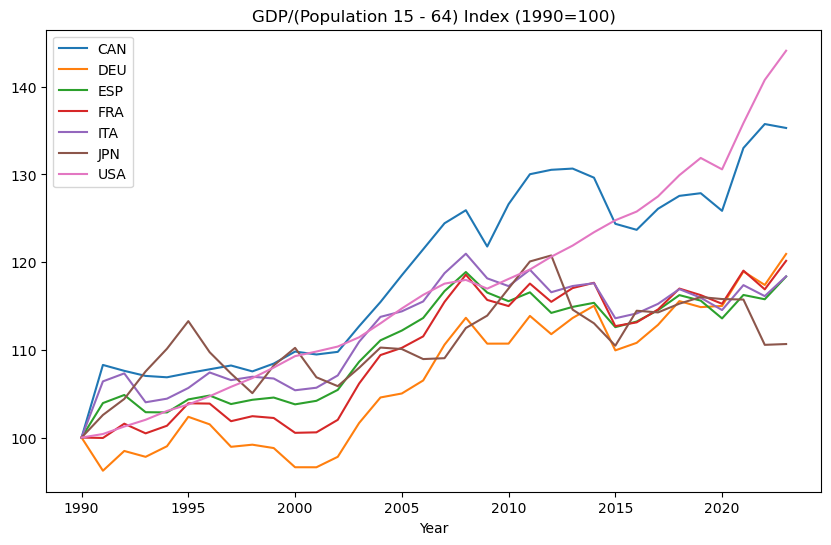

In [15]:

gdp_by_waa_df = gdp_df[year_columns_list] / waa_population_df[year_columns_list]
display(gdp_by_waa_df)
show_index_plot(gdp_by_waa_df)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,-1.081589,-0.168642,-0.653116,-0.448901,-0.548581,-0.693929,-0.760623,-0.524597,-0.695637,-0.562949,...,0.698859,0.351557,0.126533,0.252303,0.189849,0.205529,0.101837,0.438581,0.609922,0.396349
DEU,1.173722,0.154382,0.462586,0.284188,0.303678,0.492606,0.477495,0.215548,0.288383,0.058412,...,0.461906,0.168026,0.150288,0.230501,0.323552,0.214398,0.346193,0.338647,0.185033,0.294663
ESP,-1.217547,-1.818440,-1.657796,-1.388771,-1.333491,-1.249729,-1.450294,-1.535110,-1.536889,-1.405800,...,-1.613354,-1.341109,-1.357701,-1.344011,-1.328380,-1.267004,-1.333216,-1.297807,-1.060469,-0.996080
FRA,0.439895,-0.011327,0.138795,-0.016388,-0.009645,0.094896,0.133773,-0.043861,0.078743,-0.090280,...,0.212035,-0.032207,-0.102562,-0.092345,-0.030517,-0.111305,-0.094466,-0.072666,-0.197245,-0.101080
ITA,-0.809870,-0.265148,-0.288814,-0.721908,-0.690055,-0.711658,-0.539813,-0.542811,-0.494164,-0.585868,...,-0.906773,-0.886730,-0.924215,-0.945699,-0.946439,-0.962863,-0.968579,-0.952884,-0.841739,-0.808274
JPN,0.783956,1.470675,1.505037,1.712235,1.754479,1.762121,1.565794,1.403483,1.044270,1.352643,...,-0.191174,-0.064560,0.335409,0.121859,0.003644,0.088439,0.184357,-0.201648,-0.545850,-0.689510
USA,0.711433,0.638501,0.493307,0.579545,0.523615,0.305693,0.573667,1.027348,1.315293,1.233842,...,1.338501,1.805022,1.772247,1.777392,1.788292,1.832806,1.763875,1.747778,1.850346,1.903932


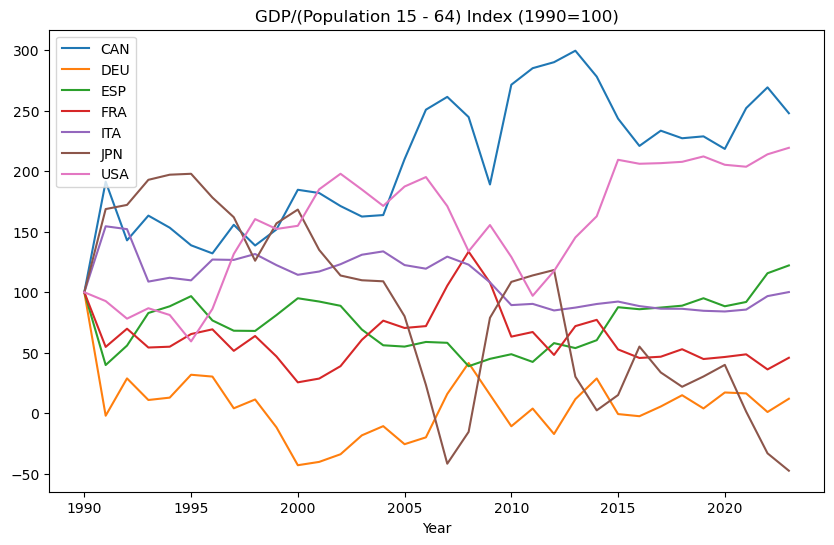

In [142]:

df = (gdp_by_waa_df-gdp_by_waa_df.mean())/gdp_by_waa_df.std()
display(df)
show_index_plot(df)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,0.056856,0.501593,0.317652,0.303085,0.254183,0.184538,0.228664,0.343877,0.294950,0.305553,...,0.783308,0.538015,0.474204,0.511409,0.487131,0.475040,0.463355,0.570133,0.573857,0.480146
DEU,1.000000,0.599803,0.670406,0.539489,0.530176,0.578493,0.639169,0.595747,0.639956,0.530811,...,0.703036,0.479680,0.481793,0.504425,0.530031,0.477901,0.542254,0.537320,0.427888,0.445082
ESP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA,0.693123,0.549422,0.568032,0.442561,0.428711,0.446445,0.525206,0.507471,0.566455,0.476907,...,0.618387,0.416036,0.401009,0.400995,0.416426,0.372829,0.399972,0.402268,0.296557,0.308619
ITA,0.170486,0.472252,0.432834,0.215047,0.208369,0.178651,0.301875,0.337679,0.365589,0.297245,...,0.239368,0.144425,0.138496,0.127607,0.122548,0.098116,0.117735,0.113253,0.075144,0.064760
JPN,0.837005,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.904977,1.000000,...,0.481792,0.405752,0.540939,0.469619,0.427387,0.437267,0.490000,0.359917,0.176795,0.105713
USA,0.806676,0.746991,0.680119,0.634735,0.601400,0.516434,0.671055,0.872002,1.000000,0.956932,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


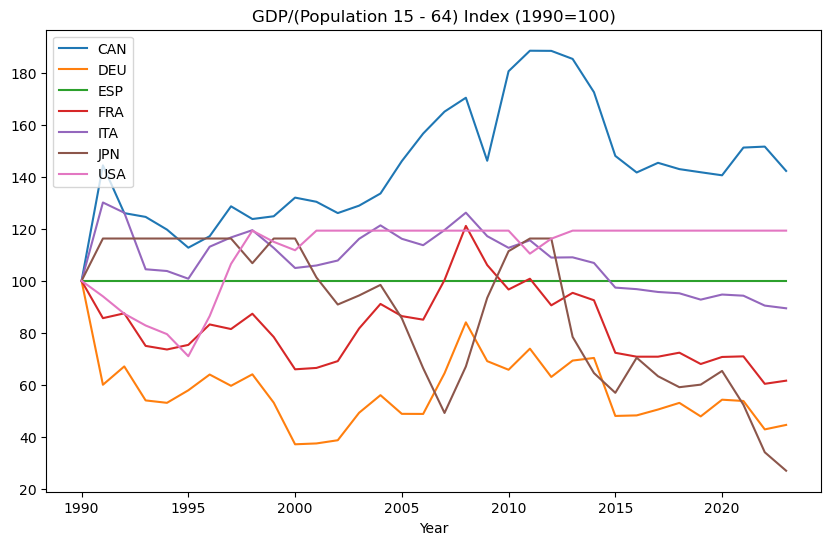

In [143]:

df = (gdp_by_waa_df-gdp_by_waa_df.min())/(gdp_by_waa_df.max()-gdp_by_waa_df.min())
display(df)
show_index_plot(df)

In [ ]:

ccode_str = ','.join(alpha2s_list)
for year in range(start_year, 2024):
    url = f'https://www.census.gov/data-tools/demo/idb/#/pop?COUNTRY_YEAR={year}&COUNTRY_YR_ANIM={year}&menu=popViz&CCODE_SINGLE=**&CCODE={ccode_str}&popPages=BYAGE&ageGroup=BR'
    print(url)

In [ ]:

import requests

url = f'https://www.imf.org/external/datamapper/api/v1/indicators'
value_obj = requests.get(f'{url}').json()
for indicator, description_dict in value_obj['indicators'].items():
    if indicator:
        label = description_dict['label']
        if label: label = label.strip()
        print(f'{indicator}: {label}')